In [43]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# Weak Scaling

### (increase problem size, increase number of processors)

### Random

In [44]:
tkrand = th.Thicket.from_caliperreader(glob("cali_data_cuda/*-0.cali"))
tkrand.dataframe = tkrand.dataframe.drop(["nid", "spot.channel", "Total time", "Min time/rank", "Max time/rank", 
                                          "Avg GPU time/rank", "Min GPU time/rank", "Max GPU time/rank", "Total GPU time"], axis=1)

In [45]:
gbrand = tkrand.groupby("InputSize")

5  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2ad85bd63d00>, 262144: <thicket.thicket.Thicket object at 0x2ad85bdccaf0>, 1048576: <thicket.thicket.Thicket object at 0x2ad85b1949a0>, 4194304: <thicket.thicket.Thicket object at 0x2ad85bdc5610>, 16777216: <thicket.thicket.Thicket object at 0x2ad85bcfaa90>}


In [46]:
ctkrand = th.Thicket.concat_thickets(
    thickets=list(gbrand.values()),
    headers=list(gbrand.keys()),
    axis="columns",
    metadata_key="num_threads"
)

In [47]:
ctkrand.dataframe

65536  \
                                                              Avg time/rank   
node                                              num_threads                 
{'name': 'main', 'type': 'function'}              2                0.565978   
                                                  4                0.348867   
                                                  8                0.525454   
                                                  16               0.525797   
                                                  32               0.499803   
{'name': 'comm', 'type': 'function'}              2                0.563724   
                                                  4                0.346728   
                                                  8                0.523398   
                                                  16               0.523700   
                                                  32               0.497718   
{'name': 'comm_large', 'type': 'function'}        2                0.563649   
                                                  4                0.346671   
                                                  8                0.523348   
                                                  16               0.523649   
                                                  32               0.497656   
{'name': 'comp', 'type': 'function'}              2                0.000240   
                                                  4                0.000130   
                                                  8                0.000097   
                                                  16               0.000095   
                                                  32               0.000096   
{'name': 'comp_large', 'type': 'function'}        2                0.000197   
                                                  4                0.000107   
                                                  8                0.000075   
                                                  16               0.000074   
                                                  32               0.000073   
{'name': 'correctness_check', 'type': 'function'} 2                0.000193   
                                                  4                0.000195   
                                                  8                0.000192   
                                                  16               0.000192   
                                                  32               0.000197   
{'name': 'data_init', 'type': 'function'}         2                0.001564   
                                                  4                0.001561   
                                                  8                0.001555   
                                                  16               0.001587   
                                                  32               0.001564   

                                                                     262144  \
                                                              Avg time/rank   
node                                              num_threads                 
{'name': 'main', 'type': 'function'}              2                0.980870   
                                                  4                0.786451   
                                                  8                0.932992   
                                                  16               0.974294   
                                                  32               0.987799   
{'name': 'comm', 'type': 'function'}              2                0.973532   
                                                  4                0.779057   
                                                  8                0.925575   
                                                  16               0.967011   
                                                  32               0.980410   
{'name': 'comm_large', 'type': 'function

In [48]:
ctkrand.dataframe = ctkrand.dataframe.reset_index().drop(("node"), axis=1)
ctkrand.dataframe = ctkrand.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])

<ipython-input-48-625f039d34c3>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ctkrand.dataframe = ctkrand.dataframe.reset_index().drop(("node"), axis=1)


In [49]:
ctkrand.dataframe

65536        262144       1048576  \
                              Avg time/rank Avg time/rank Avg time/rank   
name              num_threads                                             
main              2                0.565978      0.980870      2.930263   
                  4                0.348867      0.786451      2.916862   
                  8                0.525454      0.932992      2.919970   
                  16               0.525797      0.974294      2.893572   
                  32               0.499803      0.987799      2.898303   
comm              2                0.563724      0.973532      2.902043   
                  4                0.346728      0.779057      2.888579   
                  8                0.523398      0.925575      2.891529   
                  16               0.523700      0.967011      2.865452   
                  32               0.497718      0.980410      2.870130   
comm_large        2                0.563649      0.973471      2.901965   
                  4                0.346671      0.778992      2.888491   
                  8                0.523348      0.925521      2.891461   
                  16               0.523649      0.966947      2.865380   
                  32               0.497656      0.980347      2.870051   
comp              2                0.000240      0.000092      0.000095   
                  4                0.000130      0.000125      0.000153   
                  8                0.000097      0.000092      0.000096   
                  16               0.000095      0.000103      0.000096   
                  32               0.000096      0.000099      0.000105   
comp_large        2                0.000197      0.000071      0.000075   
                  4                0.000107      0.000104      0.000122   
                  8                0.000075      0.000072      0.000074   
                  16               0.000074      0.000080      0.000074   
                  32               0.000073      0.000078      0.000081   
correctness_check 2                0.000193      0.000735      0.002952   
                  4                0.000195      0.000746      0.002936   
                  8                0.000192      0.000745      0.002929   
                  16               0.000192      0.000750      0.002933   
                  32               0.000197      0.000757      0.002929   
data_init         2                0.001564      0.006268      0.024757   
                  4                0.001561      0.006269      0.024782   
                  8                0.001555      0.006344      0.025008   
                  16               0.001587      0.006189      0.024712   
                  32               0.001564      0.006297      0.024731   

                                    4194304      16777216  
                              Avg time/rank Avg time/rank  
name              num_threads                              
main              2               12.370992     55.649466  
                  4               12.323504     55.578328  
                  8               12.612572     55.568973  
                  16              12.360763     55.646997  
                  32              12.338248     55.563891  
comm              2               12.260180     55.205275  
                  4               12.212627     55.137371  
                  8               12.501300     55.127458  
                  16              12.249997     55.202421  
                  32              12.227546     55.122971  
comm_large        2               12.260099     55.205178  
                  4               12.212554     55.137278  
                  8               12.501205     55.127347  
                  16              12.249921     55.202325  
                  32              12.227464     55.122857  
comp              2                0.000151      0.000111  
                  4                0.000095    

In [50]:
main = ctkrand.dataframe.loc["main"]
comm = ctkrand.dataframe.loc["comm"]
comm_large = ctkrand.dataframe.loc["comm_large"]
comp = ctkrand.dataframe.loc["comp"]
comp_large = ctkrand.dataframe.loc["comp_large"]
correctness_check = ctkrand.dataframe.loc["correctness_check"]
data_init = ctkrand.dataframe.loc["data_init"]

In [51]:
regions = [main, comm, comm_large, comp, comp_large, correctness_check, data_init]
names = ["main", "comm", "comm_large", "comp", "comp_large", "correctness_check", "data_init"]

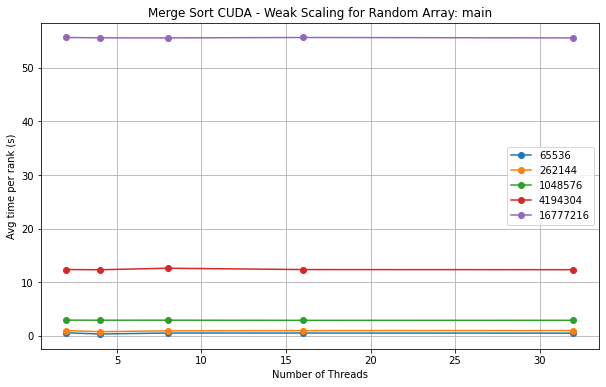

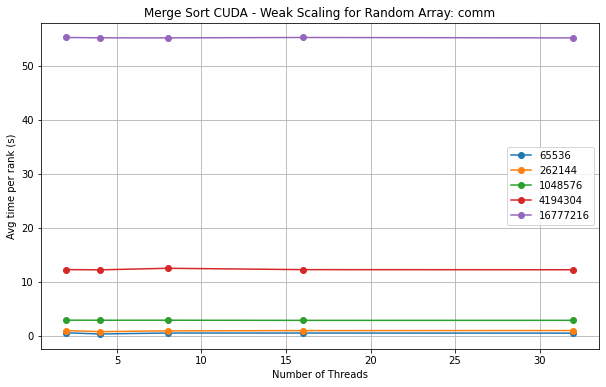

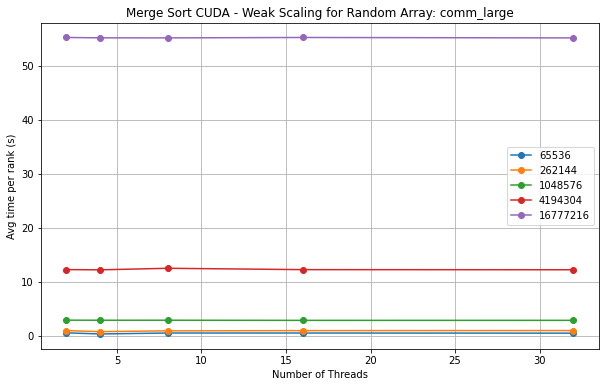

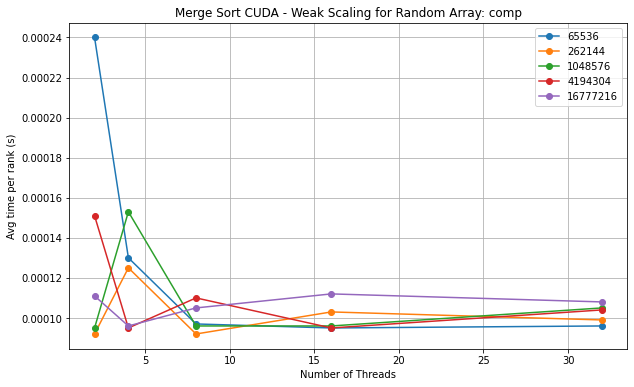

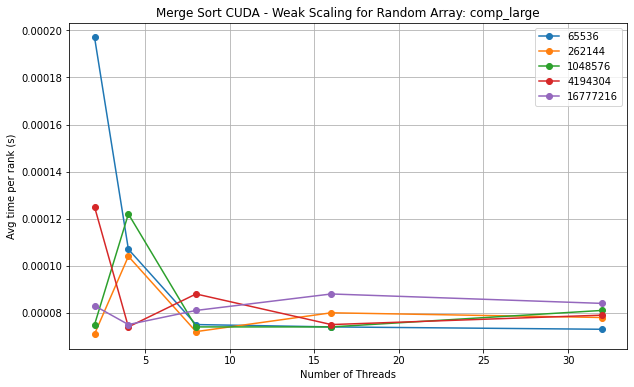

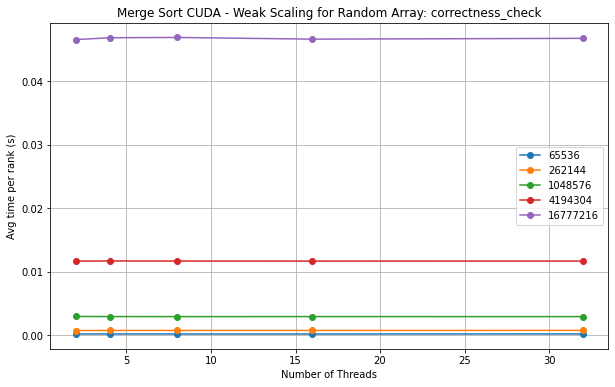

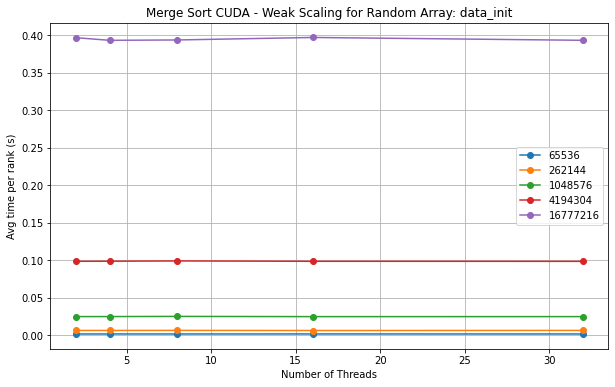

In [52]:
for region, name in zip(regions, names):
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
    legend_labels = []
    for column in region.columns:
        first_index = column[0]  # Extract the first index
        legend_labels.append(first_index)
        plt.plot(region.index, region.xs(column, axis=1), marker='o', label=column)
    
    plt.xlabel('Number of Threads')
    plt.ylabel('Avg time per rank (s)')
    plt.title(f'Merge Sort CUDA - Weak Scaling for Random Array: {name}')
    plt.legend(legend_labels)
    plt.grid(True)
    plt.show()


### Sorted

In [53]:
tksorted = th.Thicket.from_caliperreader(glob("cali_data_cuda/*-1.cali"))
tksorted.dataframe = tksorted.dataframe.drop(["nid", "spot.channel", "Total time", "Min time/rank", "Max time/rank", 
                                          "Avg GPU time/rank", "Min GPU time/rank", "Max GPU time/rank", "Total GPU time"], axis=1)
gbsorted = tksorted.groupby("InputSize")

ctksorted = th.Thicket.concat_thickets(
    thickets=list(gbsorted.values()),
    headers=list(gbsorted.keys()),
    axis="columns",
    metadata_key="num_threads"
)

5  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2ad85bdad430>, 262144: <thicket.thicket.Thicket object at 0x2ad85bcbe6a0>, 1048576: <thicket.thicket.Thicket object at 0x2ad83659caf0>, 4194304: <thicket.thicket.Thicket object at 0x2ad85bef8c10>, 16777216: <thicket.thicket.Thicket object at 0x2ad85bdf2a00>}


In [54]:
ctksorted.dataframe = ctksorted.dataframe.reset_index().drop(("node"), axis=1)
ctksorted.dataframe = ctksorted.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])

main = ctksorted.dataframe.loc["main"]
comm = ctksorted.dataframe.loc["comm"]
comm_large = ctksorted.dataframe.loc["comm_large"]
comp = ctksorted.dataframe.loc["comp"]
comp_large = ctksorted.dataframe.loc["comp_large"]
correctness_check = ctksorted.dataframe.loc["correctness_check"]
data_init = ctksorted.dataframe.loc["data_init"]

<ipython-input-54-36f24b98dd61>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ctksorted.dataframe = ctksorted.dataframe.reset_index().drop(("node"), axis=1)


In [55]:
regions = [main, comm, comm_large, comp, comp_large, correctness_check, data_init]
names = ["main", "comm", "comm_large", "comp", "comp_large", "correctness_check", "data_init"]

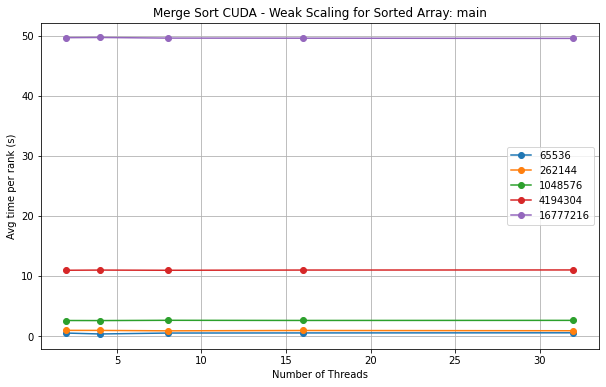

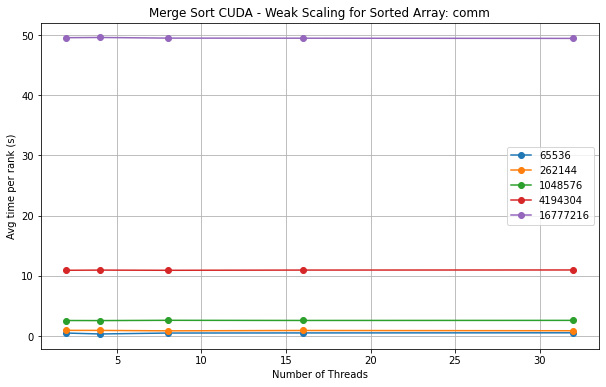

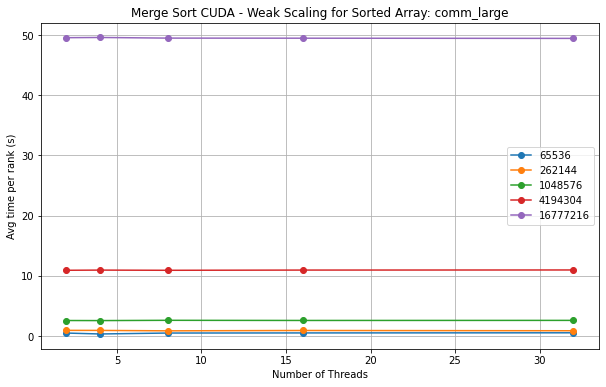

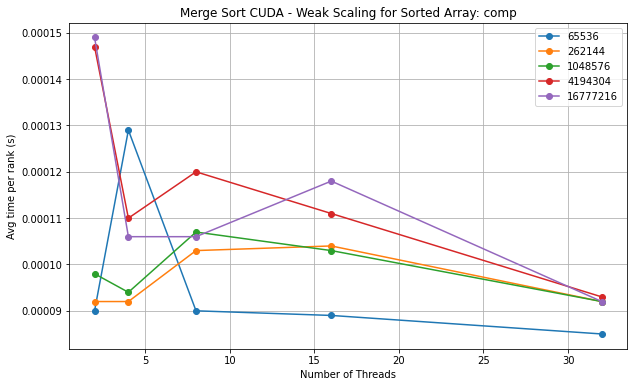

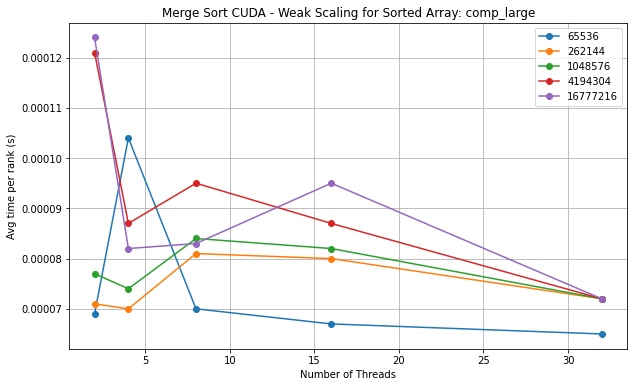

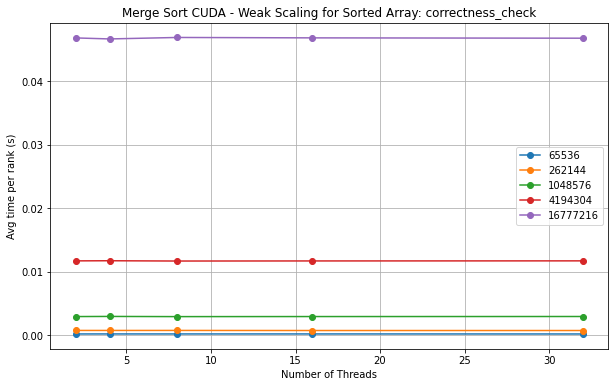

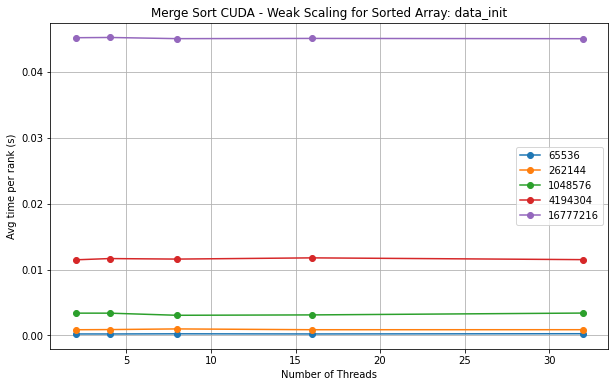

In [56]:
for region, name in zip(regions, names):
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
    legend_labels = []
    for column in region.columns:
        first_index = column[0]  # Extract the first index
        legend_labels.append(first_index)
        plt.plot(region.index, region.xs(column, axis=1), marker='o', label=column)
    
    plt.xlabel('Number of Threads')
    plt.ylabel('Avg time per rank (s)')
    plt.title(f'Merge Sort CUDA - Weak Scaling for Sorted Array: {name}')
    plt.legend(legend_labels)
    plt.grid(True)
    plt.show()


### Reverse Sorted

In [57]:
tkrev = th.Thicket.from_caliperreader(glob("cali_data_cuda/*-2.cali"))
tkrev.dataframe = tkrev.dataframe.drop(["nid", "spot.channel", "Total time", "Min time/rank", "Max time/rank", 
                                          "Avg GPU time/rank", "Min GPU time/rank", "Max GPU time/rank", "Total GPU time"], axis=1)

gbrev = tkrev.groupby("InputSize")

ctkrev = th.Thicket.concat_thickets(
    thickets=list(gbrev.values()),
    headers=list(gbrev.keys()),
    axis="columns",
    metadata_key="num_threads"
)

5  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2ad85bee52e0>, 262144: <thicket.thicket.Thicket object at 0x2ad85bd1a940>, 1048576: <thicket.thicket.Thicket object at 0x2ad85b1ffd90>, 4194304: <thicket.thicket.Thicket object at 0x2ad85bddb490>, 16777216: <thicket.thicket.Thicket object at 0x2ad85b194700>}


In [58]:
ctkrev.dataframe = ctkrev.dataframe.reset_index().drop(("node"), axis=1)
ctkrev.dataframe = ctkrev.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])

main = ctkrev.dataframe.loc["main"]
comm = ctkrev.dataframe.loc["comm"]
comm_large = ctkrev.dataframe.loc["comm_large"]
comp = ctkrev.dataframe.loc["comp"]
comp_large = ctkrev.dataframe.loc["comp_large"]
correctness_check = ctkrev.dataframe.loc["correctness_check"]
data_init = ctkrev.dataframe.loc["data_init"]

<ipython-input-58-ad95fc67489a>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ctkrev.dataframe = ctkrev.dataframe.reset_index().drop(("node"), axis=1)


In [59]:
regions = [main, comm, comm_large, comp, comp_large, correctness_check, data_init]
names = ["main", "comm", "comm_large", "comp", "comp_large", "correctness_check", "data_init"]

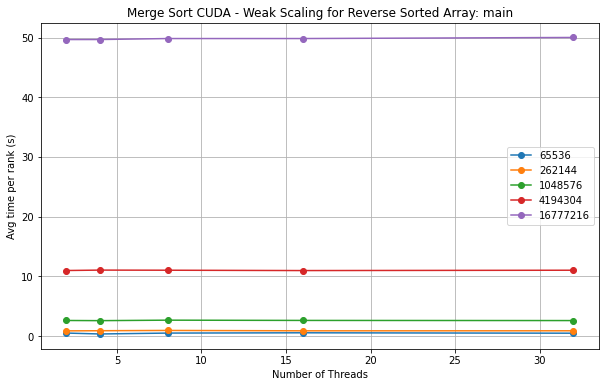

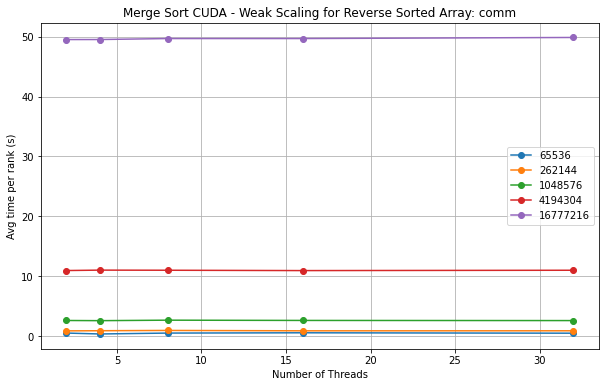

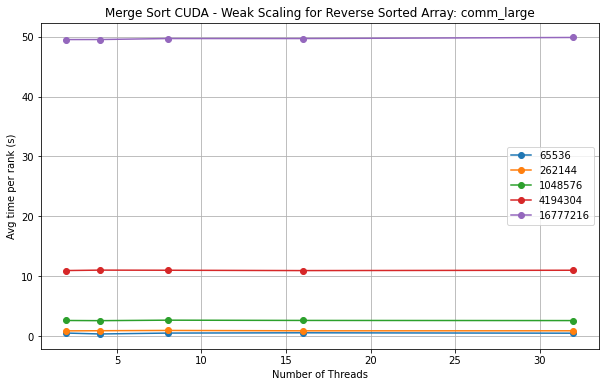

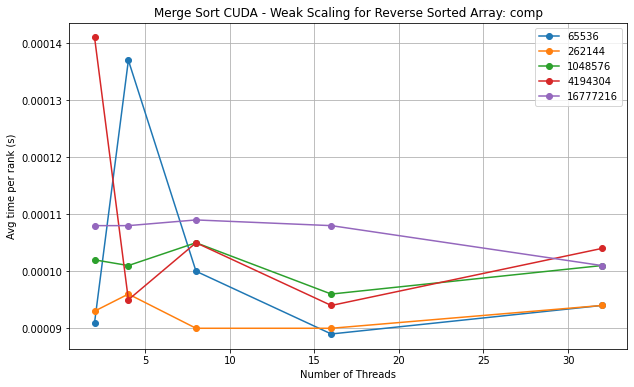

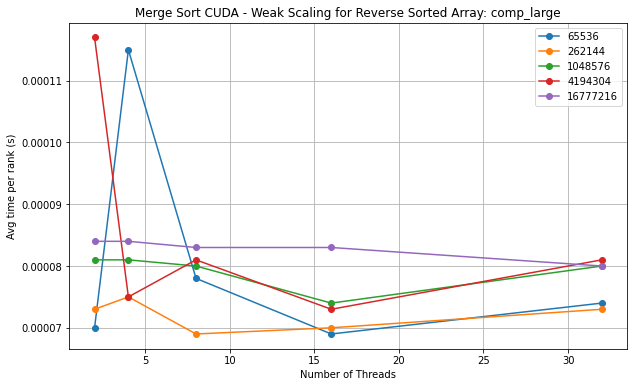

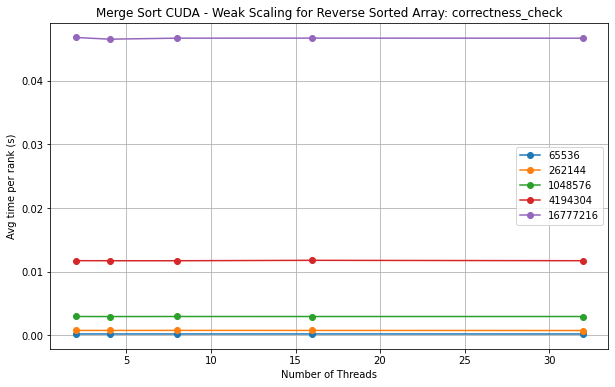

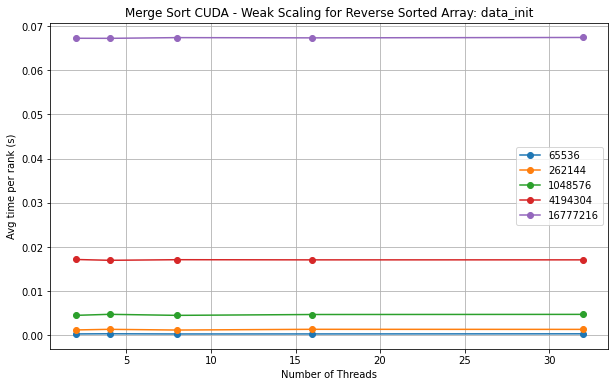

In [60]:
for region, name in zip(regions, names):
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
    legend_labels = []
    for column in region.columns:
        first_index = column[0]  # Extract the first index
        legend_labels.append(first_index)
        plt.plot(region.index, region.xs(column, axis=1), marker='o', label=column)
    
    plt.xlabel('Number of Threads')
    plt.ylabel('Avg time per rank (s)')
    plt.title(f'Merge Sort CUDA - Weak Scaling for Reverse Sorted Array: {name}')
    plt.legend(legend_labels)
    plt.grid(True)
    plt.show()


### 1% Perturbed

In [61]:
tk1 = th.Thicket.from_caliperreader(glob("cali_data_cuda/*-2.cali"))
tk1.dataframe = tk1.dataframe.drop(["nid", "spot.channel", "Total time", "Min time/rank", "Max time/rank", 
                                          "Avg GPU time/rank", "Min GPU time/rank", "Max GPU time/rank", "Total GPU time"], axis=1)

gb1 = tk1.groupby("InputSize")

ctk1 = th.Thicket.concat_thickets(
    thickets=list(gb1.values()),
    headers=list(gb1.keys()),
    axis="columns",
    metadata_key="num_threads"
)

5  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2ad85bf18ac0>, 262144: <thicket.thicket.Thicket object at 0x2ad85ae4c190>, 1048576: <thicket.thicket.Thicket object at 0x2ad85bce23a0>, 4194304: <thicket.thicket.Thicket object at 0x2ad85b239850>, 16777216: <thicket.thicket.Thicket object at 0x2ad85b2394c0>}


In [62]:
ctk1.dataframe = ctk1.dataframe.reset_index().drop(("node"), axis=1)
ctk1.dataframe = ctk1.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])

main = ctk1.dataframe.loc["main"]
comm = ctk1.dataframe.loc["comm"]
comm_large = ctk1.dataframe.loc["comm_large"]
comp = ctk1.dataframe.loc["comp"]
comp_large = ctk1.dataframe.loc["comp_large"]
correctness_check = ctk1.dataframe.loc["correctness_check"]
data_init = ctk1.dataframe.loc["data_init"]

<ipython-input-62-b557b8adc448>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ctk1.dataframe = ctk1.dataframe.reset_index().drop(("node"), axis=1)


In [63]:
regions = [main, comm, comm_large, comp, comp_large, correctness_check, data_init]
names = ["main", "comm", "comm_large", "comp", "comp_large", "correctness_check", "data_init"]

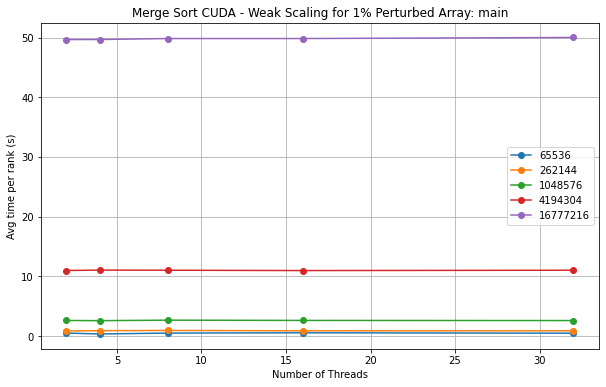

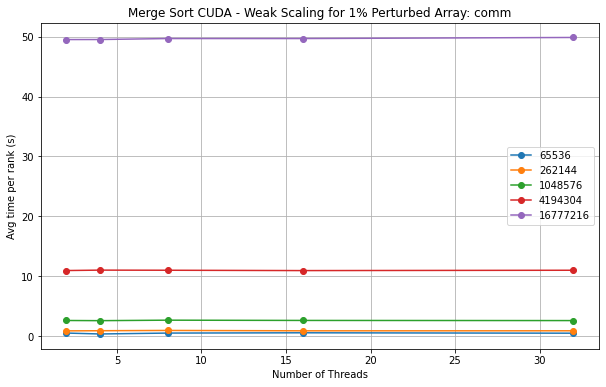

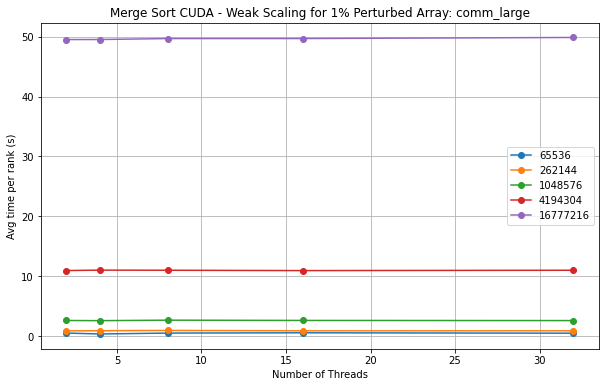

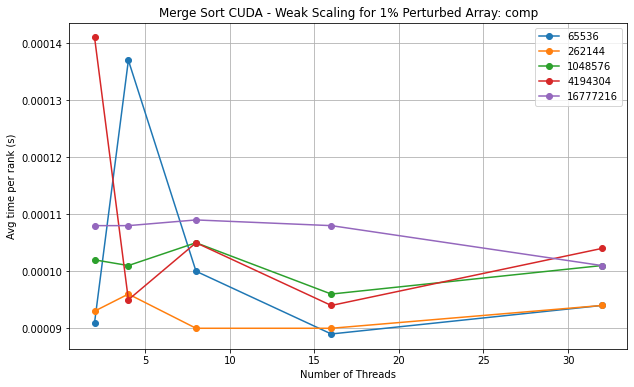

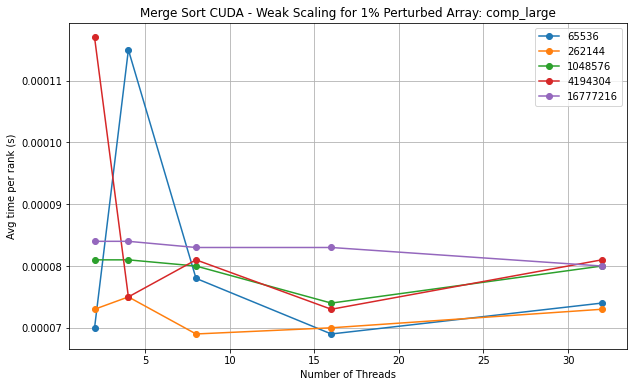

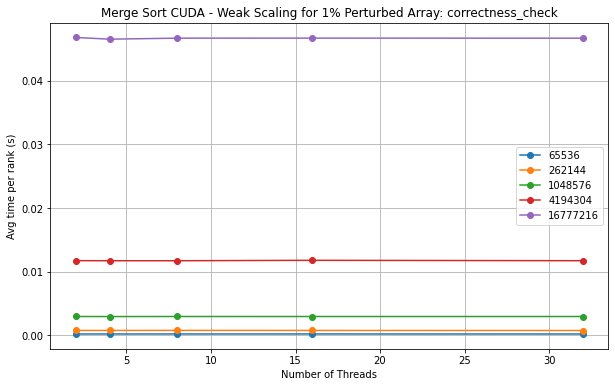

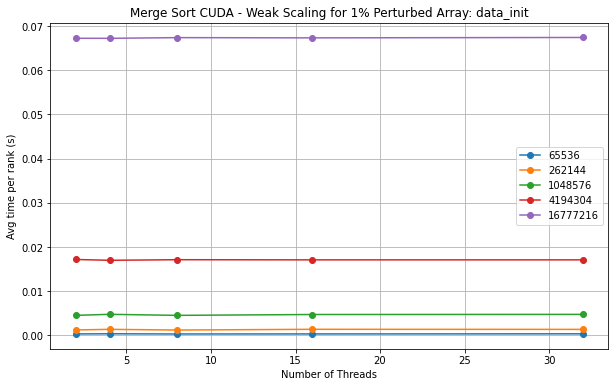

In [64]:
for region, name in zip(regions, names):
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
    legend_labels = []
    for column in region.columns:
        first_index = column[0]  # Extract the first index
        legend_labels.append(first_index)
        plt.plot(region.index, region.xs(column, axis=1), marker='o', label=column)
    
    plt.xlabel('Number of Threads')
    plt.ylabel('Avg time per rank (s)')
    plt.title(f'Merge Sort CUDA - Weak Scaling for 1% Perturbed Array: {name}')
    plt.legend(legend_labels)
    plt.grid(True)
    plt.show()
